# Analyze car paremeters

I use data from [otomoto.pl](https://www.otomoto.pl/osobowe) acces on filename (DD_MM_YYYY_hh_mm)

Main goal of analyze is found driver profiles for model.

In [1]:
import os
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import add_path, get_path_with, save_in

add_path()
from model import CV, EV, PHEV

car_types = [CV, PHEV, EV]

### set plot params

In [2]:
# plt.style.use("dark_background")
# plt.style.use("grayscale")
plt.rc("grid", alpha=0.3)
plt.rc('text', usetex=True)

kde_params = {
    "fill": True,
    "linewidth": 1,
    "common_norm": False,
}

hist_params = {
    "fill": True,
    "linewidth": 0,
    "common_norm": False,
    "common_bins": False,
    "kde": True,
    "stat": "density",
}

### Set data

In [3]:
data_file = os.sep.join([get_path_with("data"), "data", "cars02_05_2023_01_21.csv"])
df = pd.read_csv(data_file)

aliases = {
    "petrol": CV,
    "diesel": CV,
    "petrol-lpg": CV,
    "petrol-cng": CV,
    "electric": EV,
    "hybrid": PHEV,
}

df["type"] = df["fuel_type"].apply(lambda x: aliases[x])

# today_year = datetime.date.today().year
today_year = 2023
df["age"] = df["year"].apply(lambda x: today_year - x)

df["mean_year_mileage"] = df.apply(
    lambda row: row["mileage"] // row.age if row.age != 0 else None, axis=1
)
df = df[df["age"] < 30]

In [4]:
df[df["type"] == CV].count()

name                 144098
city                 144098
region               144098
make                 144098
price                144098
year                 144098
mileage              144053
engine_capacity      144085
fuel_type            144098
price.1              144098
type                 144098
age                  144098
mean_year_mileage    138911
dtype: int64

In [5]:
df.describe()

,price,year,mileage,engine_capacity,price.1,age,mean_year_mileage
count,1.480030e+05,148003.000000,1.479390e+05,145149.000000,1.480030e+05,148003.000000,140094.000000
mean,7.882431e+04,2013.508767,1.496899e+05,1987.387319,7.882431e+04,9.491233,17192.791140
std,1.212450e+05,5.561778,9.115536e+04,1043.440675,1.212450e+05,5.561778,9327.665657
min,2.000000e+03,1994.000000,1.000000e+00,1.000000,2.000000e+03,0.000000,0.000000
25%,2.500000e+04,2009.000000,7.800000e+04,1498.000000,2.500000e+04,4.000000,11333.000000
50%,4.090000e+04,2014.000000,1.450000e+05,1896.000000,4.090000e+04,9.000000,14288.000000
75%,8.650000e+04,2019.000000,2.060000e+05,1997.000000,8.650000e+04,14.000000,21555.000000
max,1.990000e+06,2023.000000,2.810500e+06,6748.000000,1.990000e+06,29.000000,200750.000000


## initial car 

"CV": 0.9041016601331263
"PHEV": 0.022126338498776606
"BEV": 0.07377200136809703


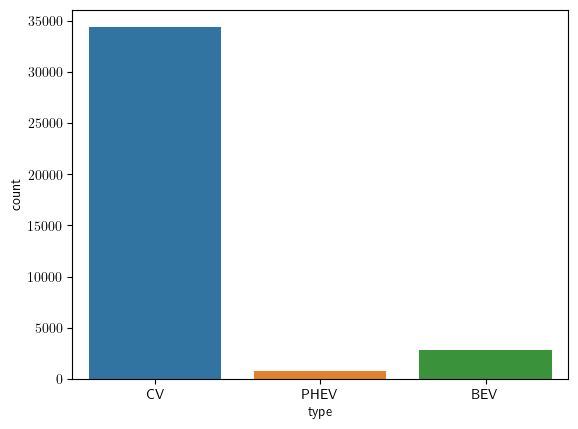

In [6]:
sns.countplot(df[df["age"] < 5], x="type", order=[CV, PHEV, EV])
initial_factorial = {}
for c_type in car_types:
    initial_factorial[c_type] = len(df[(df.type == c_type) & (df["age"] < 5)]) / len(
        df[df["age"] < 5]
    )
    print(f'"{c_type}": {initial_factorial[c_type]}')

## Mean miliage

In [7]:
suggest_profiles = {
    CV: 14000,
    PHEV: 8000,
    EV: 3000,
}

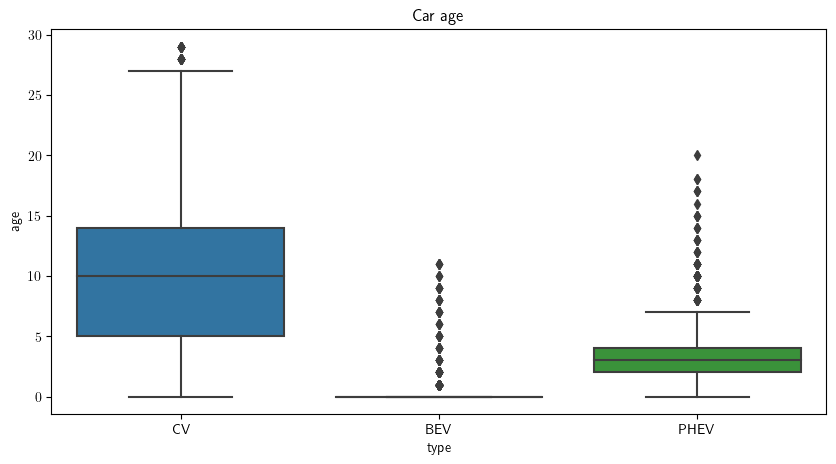

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df, y="age", x="type")

plt.title("Car age");

In [9]:
max_age = 5

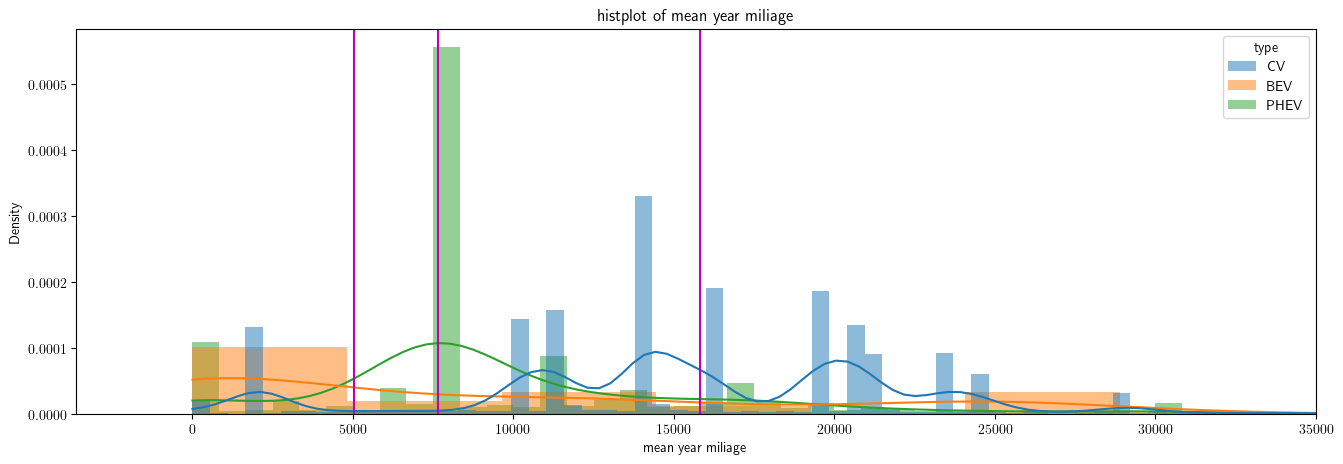

In [10]:
fig, ax = plt.subplots(figsize=(16, 5))
max_age_median = max_age

median_mean_mileage = {
    CV: df[(df["type"] == CV) & (df["age"] <= max_age_median)][
        "mean_year_mileage"
    ].median(),
    EV: df[(df["type"] == EV) & (df["age"] <= max_age_median)][
        "mean_year_mileage"
    ].median(),
    PHEV: df[(df["type"] == PHEV) & (df["age"] <= max_age_median)][
        "mean_year_mileage"
    ].median(),
}

hist_plot = sns.histplot(
    df[(df["mean_year_mileage"] < 75_000) & (df["age"] <= max_age_median)],
    x="mean_year_mileage",
    hue="type",
    **hist_params,
)


for key in suggest_profiles:
    plt.axvline(x=median_mean_mileage[key], color="m")


plt.xlim([None, 35_000])
plt.title("histplot of mean year miliage")
plt.xlabel("mean year miliage");

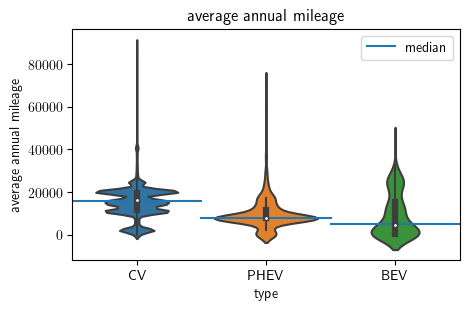

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
for i, key in enumerate(car_types):
    plt.axhline(y=median_mean_mileage[key], xmin=i / 3, xmax=(i + 1) / 3)

sns.violinplot(
    df[(df["mean_year_mileage"] < 100000) & (df["age"] < max_age)],
    y="mean_year_mileage",
    x="type",
    order=car_types,
)

plt.legend(["median"])
plt.ylabel("average annual mileage")
plt.title("average annual mileage")
save_in("averageAnnualMileage","pictures", plt)

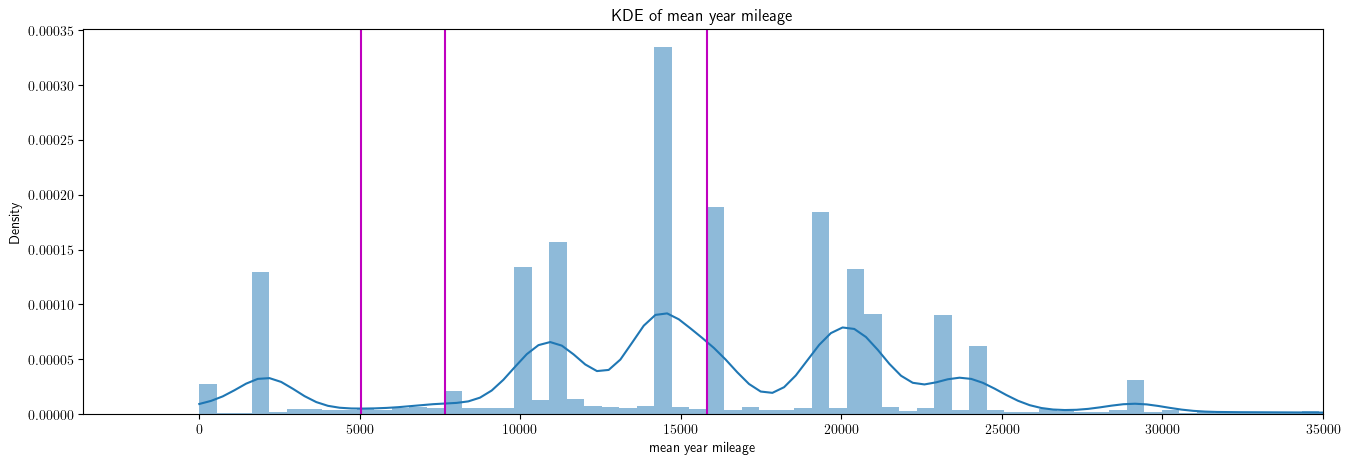

In [12]:
fig, ax = plt.subplots(figsize=(16, 5))


sns.histplot(
    df[(df["mean_year_mileage"] < 75_000) & (df["age"] <= max_age_median)],
    x="mean_year_mileage",
    **hist_params,
)

for key in suggest_profiles:
    plt.axvline(x=median_mean_mileage[key], color="m")
    # plt.axvline(x=suggest_profiles[key], color="y")


plt.xlim([None, 35_000])

plt.title("KDE of mean year mileage")
plt.xlabel("mean year mileage");

In [13]:
median_mean_mileage

{'CV': 15800.0, 'BEV': 5030.0, 'PHEV': 7666.0}

# Profiles distribution

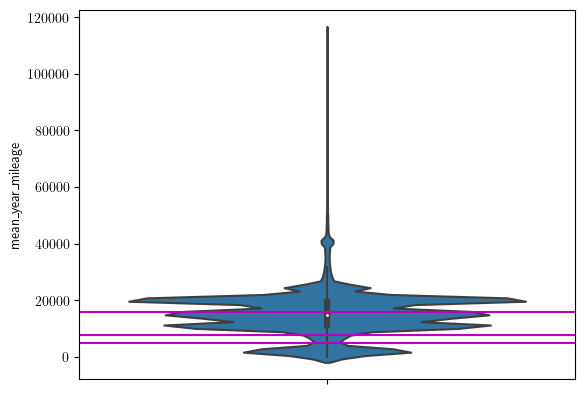

In [14]:
sns.violinplot(df[(df["age"] < max_age)], y="mean_year_mileage")
for key in suggest_profiles:
    plt.axhline(y=median_mean_mileage[key], color="m")

In [15]:
profiles_distribution = {}
k = 9

profiles_distribution[CV] = len(
    df[
        (df["age"] < max_age)
        & (
            df.mean_year_mileage
            > (median_mean_mileage[CV] * k + (10 - k) * median_mean_mileage[PHEV]) / 10
        )
    ]
) / len(df[(df["age"] < max_age)])

profiles_distribution[EV] = len(
    df[
        (df["age"] < max_age)
        & (
            df.mean_year_mileage
            < (median_mean_mileage[EV] * k + (10 - k) * median_mean_mileage[PHEV]) / 10
        )
    ]
) / len(df[(df["age"] < max_age)])

profiles_distribution[PHEV] = 1 - profiles_distribution[CV] - profiles_distribution[EV]

In [16]:
(median_mean_mileage[CV] * k + (10 - k) * median_mean_mileage[PHEV]) / 10

14986.6

In [17]:
median_mean_mileage[CV]

15800.0

In [19]:
median_mean_mileage

{'CV': 15800.0, 'BEV': 5030.0, 'PHEV': 7666.0}

: 

In [18]:
profiles_distribution

{'CV': 0.39540635112736455,
 'BEV': 0.09697703175563682,
 'PHEV': 0.5076166171169987}